In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
4096*100

409600

In [210]:
N=4096
np.random.seed(42)
n=np.arange(0,409600)
k=1150
delay=-50000
dphase = 2*np.pi*k*delay/N
# print(delay%(2*np.pi))
d=200000
dk = 30 # BW of 6 kHz
y=np.sinc(dk*(n-d)/N)*np.cos(2*np.pi*k*(n-d)/N)#+0.01*np.random.randn(N)
y2=np.sinc(dk*(n-delay-d)/N)*np.cos(2*np.pi*k*(n-delay-d)/N)#+0.01*np.random.randn(N)


# z=np.zeros(2*N,dtype=y.dtype)
# z2=np.zeros(2*N,dtype=y.dtype)
# z[:N]=y
# z2[:N]=y2
# ft = np.fft.fft(z)
# ft2=np.fft.fft(z2)

# k=510
# y=np.cos(2*np.pi*k*n/N)+np.random.randn(N)
# y2=np.cos(2*np.pi*k*n/N - dphase)+np.random.randn(N)
# ft1=np.fft.fft(y)
# ft3=np.fft.fft(y2)


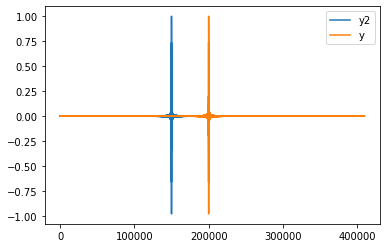

In [211]:
plt.plot(y2.real,label='y2')
plt.plot(y,label='y')# plt.xlim(0,200)
plt.legend()

In [212]:
yy=y.reshape(-1,4096)
yy2=y2.reshape(-1,4096)
f1=np.fft.rfft(yy,axis=1)
f2=np.fft.rfft(yy2,axis=1)

In [213]:
xcorr=f1*np.conj(f2)

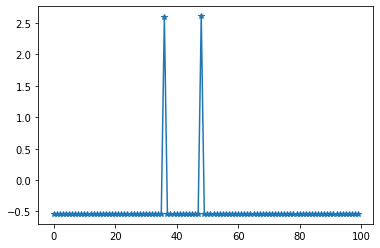

In [214]:
plt.plot(np.angle(xcorr[:,1150]),'-*')

In [215]:
## Correlate the whole thing

a=np.zeros(2*len(y),dtype=y.dtype)
a2=np.zeros(2*len(y2),dtype=y.dtype)
a[:len(y)]=y.copy()
a2[:len(y2)]=y2.copy()
xcorrtime1=np.fft.irfft(np.fft.rfft(a)*np.conj(np.fft.rfft(a2)))

50000


(49900.0, 50100.0)

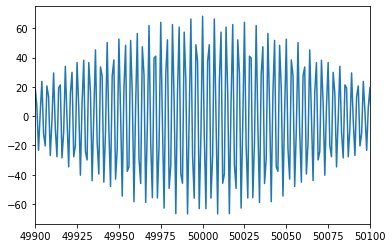

In [216]:
plt.plot(xcorrtime1)
m=np.argmax(xcorrtime1)
print(m)
plt.xlim(m-100,m+100)

50000


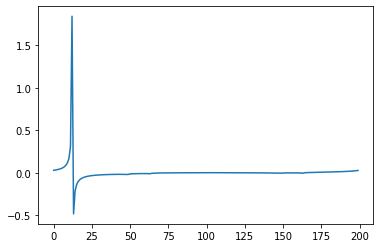

In [217]:
plt.plot(xcorrtime1[::4096])
m=np.argmax(xcorrtime1)
print(m)
# plt.xlim(m-10,m+10)

In [218]:
Nsmall=yy.shape[0]
p0=np.zeros(2*Nsmall,dtype=yy.dtype)
p1=np.zeros(2*Nsmall,dtype=yy.dtype)
p0[:Nsmall]=yy[:Nsmall,1150].flatten()
p1[:Nsmall]=yy2[:Nsmall,1150].flatten()
ft1=np.fft.fft(p0)
ft2=np.fft.fft(p1)
xcorr=ft1*np.conj(ft2)
xcorrtime2=np.fft.ifft(xcorr)

Text(0.5, 0, 'spec num')

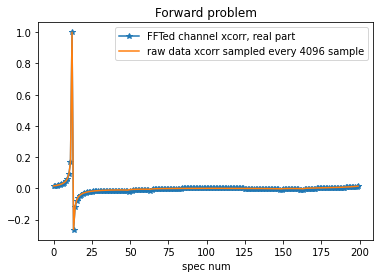

In [219]:
plt.plot(np.real(xcorrtime2)/np.max(np.real(xcorrtime2)),'-*',label='FFTed channel xcorr, real part')
plt.plot(np.real(xcorrtime1[::4096])/np.max(xcorrtime1[::4096]),label='raw data xcorr sampled every 4096 sample')
plt.legend()
plt.title('Forward problem')
plt.xlabel('spec num')

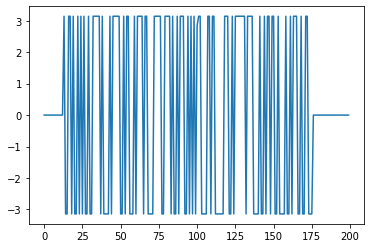

In [220]:
plt.plot(np.angle(xcorrtime2))